<a href="https://colab.research.google.com/github/stefanogiagu/corso_AI_2024/blob/main/notebooks/es2/MetodiAI_Fis2024_Es2_python2_ClassificatoreNaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esercitazione 2: python e uso librerie numpy, matplotlib, pandas

**Task:**

implementare senza fare uso di librerie dedicate di Machine Learning un semplice algoritmo di classificazione basato sulla stima delle densità di probabilità delle feature discriminanti (*Classificatore Naive di Bayes*)

**Parte 0:**

Giocare con numpy:

In [ ]:
# confronto tra un vettore 1D in numpy e una lista in python

import numpy as np  #import della libereria numpy associandogli come namespace l'acronimo "np" (eg. le funzioni di numpy verranno chiamate come np.xxxx )

# creo un vettore di dimensione "dim" usando una lista python

dim = 10
lista_python = list(range(dim))

# creo un array numpy di dimensione "dim"

array_numpy = np.arange(dim)  #la funzione np.arange rappresenta l'equivalente numpy di range di python

print(lista_python)
print('')
print(array_numpy.shape) #stampa le dimensioni di un array numpy
print('')
print(array_numpy)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

(10,)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# confrontiamo i tempi necessari per fare una semplice operazione su i due vettori

dim = 100000
lista_python = list(range(dim))
array_numpy = np.arange(dim)

%timeit lista_python_2 = [x * 2 for x in lista_python]   #il modulo timeit di python permette du misurare il tempo di esecuzione di semplici parti di codice python

%timeit array_numpy_2 = array_numpy * 2

print('numpy is typically 100 times faster than python')

7.02 ms ± 288 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
63.4 µs ± 4.16 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
numpy is typically 100 times faster than python


In [ ]:
# un array multidimensionale in numpy

array2 = np.ones(shape=(100,10,10))  #np.ones crea un arry con tutti gli elementi inizializzati a 1 (np.zeros a zero, np.empty non inizalizza i valori, np.full inizializza al valore indicato)
array2int = np.ones(shape=(100,10,10),dtype='int32')
array3 = np.full(shape=(100,10,10), fill_value=33.0)

print(array2.shape,'\n')
print(array2.dtype,'\n')
print(array2int.dtype,'\n')
print(array2[:2,:,:],'\n') # array[a:b] seleziona gli elementi da a a b-1 dell'array ([:] equivale all'intero array)
print(array2int[:2,:,:],'\n')
print(array3[:2,:,:],'\n')

(100, 10, 10) 

float64 

int32 

[[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]] 

[[[1 1 1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1 1 1 1 1]]

 [[1 1 1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1

In [ ]:
# generazione di numeri random con numpy

# numpy contiene una libreria di generatori di numeri random molto ampia (più o meno tutte le distribuzioni note)

gaussian_array = np.random.normal(loc=4.0, scale=2.0, size=(100))  #array di dimensione (100) contenente numeri gaussiani random con mu=loc, sigma=scale

uniform_array = np.random.uniform(low=0.,high=22.0, size=(10,10)) #array di dimensione (10,10) contenente numeri uniformi random tra low e high

print(gaussian_array[:10],'\n')
print(uniform_array[0,:],'\n')

[3.19554903 2.77273158 5.09074364 7.80348966 2.33664713 3.7990055
 1.73520031 0.2308879  4.96775811 1.21735823] 

[ 4.83269522 18.57533097 16.85871586 20.56395786 20.99880319 11.2864805
 21.1987459   0.39644382  5.54926219 21.93539221] 



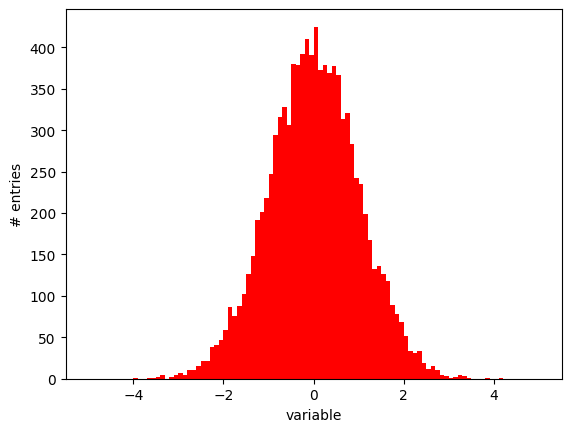

In [ ]:
# histogramma in matplotlib contenente la distribuzione generata da numpy
import matplotlib.pyplot as plt #importa il modulo pyplot di matplotlib (un sottoset di tool di alto livello per produrre i plot più utilizzati)

gaussian_array2 = np.random.normal(loc=0.0, scale=1.0, size=(10000))


n, bins, _ = plt.hist(gaussian_array2, bins=100, range=[-5.,5.], color='red', density=False, cumulative=False)
plt.xlabel('variable')
plt.ylabel('# entries')
plt.draw()

**Parte 1:**

Generazione di un dataset "toy":

1. generare due campioni di esempi (uno per la classe segnale ($S$) e uno per la classe fondo ($B$)).<p>

> Ogni esempio è descritto da un vettore di dimensione $d=3$, in cui le tre feature, $(x_0,x_1,x_2)$, sono distribuite in accordo a distribuzioni gaussiane multivariate: $f(x_0,x_1,x_2) = GaussianaMultivariata(x_0,x_1,x_2:\mu, cov)$, con $\mu$ il vettore delle medie delle tre variabili e $cov$ la matrice $3\times 3$ di covarianza (ogni dimensione corrisponde ad una feature (osservabile) del dataset). <p>

> `Suggerimento: usare la funzione numpy: np.random.multivariate_normal(mean, cov, size) in cui mean è un vettore con i valori medi delle 3 feature, e cov è la matrice 3x3 di covarianza`

> le medie delle due distribuzioni per segnale e fondo da utilizzare sono: $\mu_S = [0.0, 4.0, -1.0]$, $\mu_B = [-2.5, 2.0, 2.0]$
> la matrice di covarianza tra le variabili è la stessa per le due classi $S$ e $B$ ed è data dalla matrice diagonale $diag[4.0, 1.0, 2.25]$
> la dimensione dei campioni è di $N=3000$ esempi per ognuna delle due classi.

2. graficare le distribuzioni delle feature delle due classi su tre proiezioni 2D: $(x_0,x_1), (x_0,x_2), (x_1,x_2)$ colorando con colori rosso e blu i punti appartenenti agli eventi di classe $S$ e $B$ rispettivamente <p>

>`Suggerimento: usare la funzione matplotlib: plt.plot(x,y, color) in cui color='r' o 'b')`


In [ ]:
#code

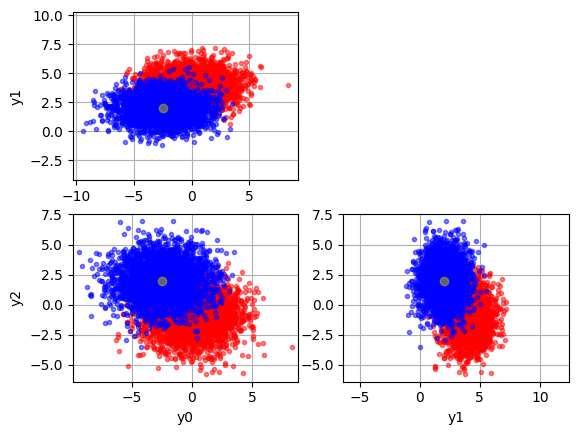

In [ ]:
#@title Soluzione Parte 1 (clicca su show code per vedere il codice)
import numpy as np
import matplotlib.pyplot as plt

# genera 3 osservabili gaussiane, correlate (x1,x2,x3)

N = 3000

# valori medi delle tre osservabili
muS = np.array([0.0, 4.0, -1.0])
muB = np.array([-2.5, 2.0, 2.0])

# matrice di covarianza
rS = np.array([
        [ 4.0, 0.0, 0.0],
        [ 0.0, 1.0, 0.0],
        [ 0.0, 0.0, 2.25]
    ])

rB = rS

#nota: a=b tra due oggetti python non crea un nuovo oggetto, a e b puntano alla stessa locazione di memoria modificando uno si modifica anche l'altro
#      se si vuole creare una copia separata (in questo caso non è necessario) si deve fare una deep copy: b = a.copy()

# Generazione usando numpy
yS = np.random.multivariate_normal(muS, rS, size=N)
yB = np.random.multivariate_normal(muB, rB, size=N)


# Plot delle diverse proiezioni
plt.subplot(2,2,1)
plt.plot(yS[:,0], yS[:,1], 'r.', alpha=0.5)
plt.plot(yB[:,0], yB[:,1], 'b.', alpha=0.5)
plt.plot(muS[0], muS[1], 'ro', alpha=0.5)
plt.plot(muB[0], muB[1], 'yo', alpha=0.5)
plt.ylabel('y1')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(yS[:,0], yS[:,2], 'r.', alpha=0.5)
plt.plot(yB[:,0], yB[:,2], 'b.', alpha=0.5)
plt.plot(muS[0], muS[2], 'ro', alpha=0.5)
plt.plot(muB[0], muB[2], 'yo', alpha=0.5)
plt.xlabel('y0')
plt.ylabel('y2')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(yS[:,1], yS[:,2], 'r.', alpha=0.5)
plt.plot(yB[:,1], yB[:,2], 'b.', alpha=0.5)
plt.plot(muS[1], muS[2], 'ro', alpha=0.5)
plt.plot(muB[1], muB[2], 'yo', alpha=0.5)
plt.xlabel('y1')
plt.axis('equal')
plt.grid(True)

plt.show()

**Parte 2:**

Stima delle funzioni di distribuzione di probabilità delle singole osservabili per le due classi $S$ e $B$: <p>

>$pdf(x_0|C),~ pdf(x_1|C), ~pdf(x_2|C)$ con $C=S,B$

Procedura:

1. costruire 3 histogrammi per ciascuna classe, con $M=20$ bin negli intervalli $(\mu-4\sigma, \mu+4\sigma)$ che contengano la distribuzione della densità di probabilità delle features $x_0,x_1,x_2$ nelle due classi. <p>

> `Suggerimento: costruire un histogramma con plt.hist e riempirlo con ciascuna feature, usando l'opzione di avere histogrammi normalizzati (density=True)`

> NOTA: usare solo i primi 2000 eventi di ogni campione per costruire gli istogrammi, lasciando i restanti 1000 come campione di test.


2. scrivere una funzione python che prende in input un valore della feature $x$, uno degli istogrammi $H$, e ritorna la stima della probabilità associata $f(x_i) = pdf(x_i|S)$. <p>  

>SUGGERIMENTO: la funzione *n, edges, patches = plt.hist(x,...)* di matplotlib ritorna tre array numpy: *n* contenenente il contenuto dei bin, *edges* contenente le edge (il valore della $x$ corrispondente all'estremo superiore) di ogni bin, ed il terzo non interessante per gli scopi.

> la funzione deve identificare quale è l'indice del array *edges* che contiene il valore della feature *x*, e poi prendere come stima della probabilità $p(x|C)$ il valore dell array *n* che corrisponde a quel bin

>SUGGERIMENTO: la funzione *np.where* permette ritorna gli elementi del vettore che soddisfano una data condizione.

3. plottare con matplotlib gli istogrammi così costruiti

In [ ]:
#codice

pdf(x0=4.0|S) =  0.03937500000000005
pdf(x0=4.0|B) =  0.0



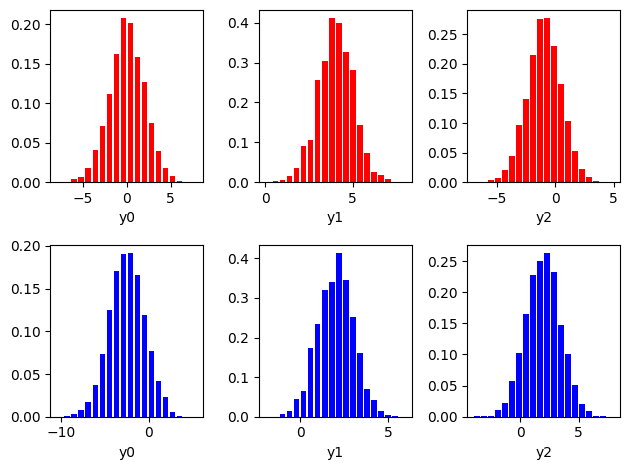

In [ ]:
#@title Soluzione Parte 2 (clicca sul show code per vedere il codice)
import numpy as np
import matplotlib.pyplot as plt

pdfS = []
edgesS = []
pdfB = []
edgesB = []
for i in range(3):
  plt.subplot(2,3,i+1)
  n, edges, _ = plt.hist(yS[:2000,i], bins=20, rwidth=0.8, color='red', range=(muS[i]-4*np.sqrt(rS[i,i]),muS[i]+4*np.sqrt(rS[i,i])), density=True)
  plt.xlabel('y'+str(i))
  pdfS.append(n)
  edgesS.append(edges)
  plt.subplot(2,3,i+4)
  n, edges, _ = plt.hist(yB[:2000,i], bins=20, rwidth=0.8, color='blue', range=(muB[i]-4*np.sqrt(rB[i,i]),muB[i]+4*np.sqrt(rB[i,i])), density=True)
  plt.xlabel('y'+str(i))
  pdfB.append(n)
  edgesB.append(edges)
plt.tight_layout()

def pdf_fun(x,P,E):
  if x>E[-1]: return 0.0 #above max range (NOTA array[-1] identifica l'ultimo elemento di un array)
  res = np.where(E<x)[0] #la funzione ritorna un array(lista, ), lo [0] serve per estrarre la lista
  if np.size(res)>0:
      return P[res[-1]] #res[-1] seleziona l'ultimo elemento della lista
  return 0.0

print('pdf(x0=4.0|S) = ', pdf_fun(4.0, pdfS[0], edgesS[0]))
print('pdf(x0=4.0|B) = ', pdf_fun(4.0, pdfB[0], edgesB[0]))
print()

**Parte 3:**

Costruire un classificatore basato sul cosidetto maximum likelihood ratio (MLR). Il MLR permette di definire un discriminante statistico per gli eventi appartenenti tra due classi, tramite il rapporto tra le distribuzioni di probabilità $p(x|C)$ delle feature nelle due classi. <p>

Assumendo stesse probabilità a priori per le due classi $P(S)=P(B)$ il discriminante di MLR assume la forma:

> $\color{red}{d(x_0,x_1,x_2) = \frac{\prod_{i} p(x_i|S)}{\prod_{i}\, p(x_i|S)~+~\prod_{i}\, p(x_i|B)}}$

in cui la produttoria scorre sulle pdf delle tre features $i=1,\cdots,3$.

Quando $\prod_{i} p(x_i|S) \gg \prod_{i} p(x_i|B) \Rightarrow d\to 1$, quando $\prod_{i} p(x_i|S) \ll \prod_{i} p(x_i|B) \Rightarrow d\to 0$.

1.    costruire la funzione discriminante $d(x_0,x_1,x_2)$;
2.    printare i valori di $d(\mu_S)$ e $d(\mu_B)$
3.    graficare un istogramma della variabile discriminante $d$ per gli eventi delle classi $S$ (colore rosso) e $B$ (colore blu);
4.    costruire una funzione che implementi la regola di classificazione: <p>
$\color{red}{d(x_0,x_1,x_2)\ge 0.5 \to \text{classe}\,S;\,\,\text{altimenti} \to \text{classe}\,B}$
5.    usando i 2000 eventi del campione usato per costrire le pdf calcolare **accuracy, precision, recall** e confusion matrix
6.    ripetere il calcolo usando i 1000 eventi del test set che **non** sono stati utilizzati per calcolare le pdf, e confrontare i risultati ottenuti.

In [ ]:
#codice

d(muS) =  0.9917079259247936
d(muB) =  0.006394145182250522
Confusion matrix training:
[[1867  133]
 [ 130 1870]]

accuracy train:  0.93425
precision train:  0.9349023535302955
recall train:  0.9335

Confusion matrix test:
[[936  64]
 [ 89 911]]

accuracy test:  0.9235
precision test:  0.9131707317073171
recall test:  0.936


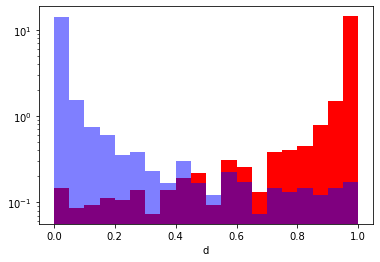

In [ ]:
#@title Soluzione Parte 3 (clicca su show code per vedere il codice)
import numpy as np
import matplotlib.pyplot as plt

def d(X,PS,ES,PB,EB):

  S = 1.0
  B = 1.0
  for i in range(3):
    S *= pdf_fun(X[i],PS[i],ES[i])
    B *= pdf_fun(X[i],PB[i],EB[i])
  if (S+B)>0:
    return S/(S+B)
  else:
    return 0.5

print('d(muS) = ', d(muS, pdfS,edgesS,pdfB,edgesB))
print('d(muB) = ', d(muB, pdfS,edgesS,pdfB,edgesB))

dS = [d(x,pdfS,edgesS,pdfB,edgesB) for x in yS]
dB = [d(x,pdfS,edgesS,pdfB,edgesB) for x in yB]

plt.hist(dS, bins=20, color='red', range=(0,1), density=True)
plt.xlabel('d')
plt.hist(dB, bins=20, color='blue', alpha=0.5, range=(0,1), density=True)
plt.xlabel('d')
plt.yscale('log')

def disc(X, PS,ES,PB,EB):
  if d(X,PS,ES,PB,EB)>=0.5:
    return  1 #classe S
  else:
    return -1 #classe B

# Confusion matrix training set

resS_train = [disc(x,pdfS,edgesS,pdfB,edgesB) for x in yS[:2000]]
resB_train = [disc(x,pdfS,edgesS,pdfB,edgesB) for x in yB[:2000]]

TP = np.sum((np.array(resS_train)>=0) == True)
FN = np.sum((np.array(resS_train)<0) == True)
TN = np.sum((np.array(resB_train)<0) == True)
FP = np.sum((np.array(resB_train)>=0) == True)

conf_mat_train = np.array([[TP, FN],[FP, TN]])
print('Confusion matrix training:')
print(conf_mat_train)
print()

acc_train = (TP+TN)/(TP+TN+FN+FP)
precision_train = TP/(TP+FP)
recall_train = TP/(TP+FN)
print('accuracy train: ', acc_train)
print('precision train: ', precision_train)
print('recall train: ', recall_train)
print()

resS_test = [disc(x,pdfS,edgesS,pdfB,edgesB) for x in yS[2000:]]
resB_test = [disc(x,pdfS,edgesS,pdfB,edgesB) for x in yB[2000:]]

TP = np.sum((np.array(resS_test)>=0) == True)
FN = np.sum((np.array(resS_test)<0) == True)
TN = np.sum((np.array(resB_test)<0) == True)
FP = np.sum((np.array(resB_test)>=0) == True)

conf_mat_test = np.array([[TP, FN],[FP, TN]])
print('Confusion matrix test:')
print(conf_mat_test)
print()

acc_test = (TP+TN)/(TP+TN+FN+FP)
precision_test = TP/(TP+FP)
recall_test = TP/(TP+FN)
print('accuracy test: ', acc_test)
print('precision test: ', precision_test)
print('recall test: ', recall_test)


**Suggeriti per casa:**
1.   provare a giocare con le medie e le varianze delle osservabili, cambiandone i valori. A che punto il classificatore perde il suo potere di classificare gli eventi delle due classi?
2.   provare a ripetere il problema assumendo una matrice di covarianza correlata tra le osservabili (senza cambiare gli elementi della diagonale principale). Le prestazioni dell'algoritmo di classificazione migliorano o peggiorano?
3.   scrivere in python una funzione 2D che rappresenti la funzione: $f(x,y) = x^2-y^2-xy$
* graficarla con matplotlib (plot 2D $(x,y)$ con intensità colori $f(x)$)
* graficare le curve di livello (isocurve della funzione)

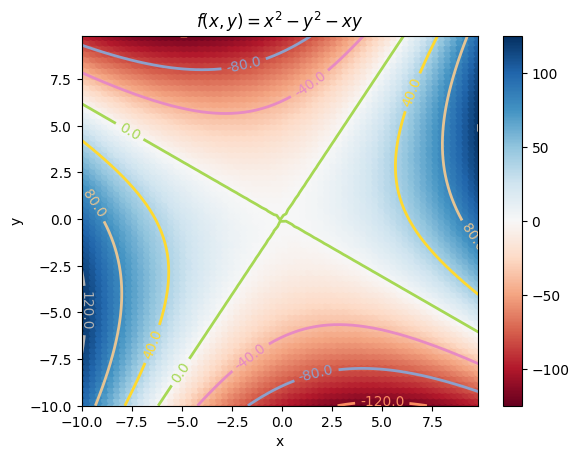

In [ ]:
#@title Soluzione esercizio per casa #3
import matplotlib.pyplot as plt

def fun_2d(x,y):
  return x**2-y**2+x*y

xx = np.arange(-10,10,0.3)
yy = np.arange(-10,10,0.3)
X,Y = np.meshgrid(xx,yy)

Z = fun_2d(X,Y)
plt.scatter(X,Y, c=Z, cmap='RdBu')
plt.colorbar() # adding the colorbar on the right
cset = plt.contour(X,Y,Z,linewidths=2,cmap='Set2')
plt.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
plt.title('$f(x,y)=x^2-y^2-xy$')
plt.xlabel('x')
plt.ylabel('y')
plt.show()